In [13]:
using Pkg
Pkg.add("Plots")
Pkg.add("PyCall")
Pkg.add("PyPlot")

  Updating registry at `C:\Users\Jualn\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `C:\Users\Jualn\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\Jualn\.julia\environments\v1.1\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\Jualn\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\Jualn\.julia\environments\v1.1\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\Jualn\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\Jualn\.julia\environments\v1.1\Manifest.toml`
 [no changes]


In [2]:
using Printf, Plots
pyplot(size=(370,270))

Plots.PyPlotBackend()

In [3]:
function a(x)
    if 0<= x <= MathConstants.pi
        return cos(x)
    else
        return (x-MathConstants.pi)-1
    end
end

function c(x)
    return (-2x)/(1+x^2)^2
end

function b(x)
    return exp(x-exp(1)) - x + exp(1)
end
function d(x)
    return(abs(-4 + x +sin(3(x-4)/4)))
end
function e(x)
    if 0 <= x <= BigFloat(6)
        return BigFloat(2) + BigFloat(sin(BigFloat(x) + BigFloat(2)))/BigFloat(log(BigFloat(x) + BigFloat(2)))
    else
        return (BigFloat(x) - BigFloat(6))^2 + BigFloat(2.48)
    end
end

function f(x)
    return (x)^6 - 3(-x^5) + 6(x^4) + 20(-x^3) - x
end

function g(x)
    return (BigFloat(x)-BigFloat(2))^2 + BigFloat(4)
end
function h(x)
    if 0<= x <= 20
        return -(x-18)^3 + 8
    else
        return -(34*atan(x-20))/(x-19)
    end
end
function i(x)
    return (x+4)*(x+1)*(x-1)*(x-2)/20
end
function j(x)
    if 0<= x <= 2
        return MathConstants.e^(-x)
    else
        return (x - 2 + MathConstants.e^(-2))
    end
end
function k(x)
    return -12*sin(x - 1.89) + (x - 1.89)^2
end
function l(x)
    if x <= 10
        return -x
    elseif 10 < x < 11
        return - 10
    else
        return x-21
    end
end
function m(x)
    return abs(MathConstants.e^((x-9)^2-(x-9)^3)-x-9)
end
func = [a, b, c, d, e, f, g, h, i, j, k, l]
funcval = [MathConstants.pi, MathConstants.e, 1/sqrt(3), 4, BigFloat(2.56933246205169214815), BigFloat(1.19915499721912693470) , 2, BigFloat(21.22913364222171637180), BigFloat(1.56970497975307382105), 2, BigFloat(3.23475104537569968834), 10]

12-element Array{BigFloat,1}:
  3.141592653589793238462643383279502884197169399375105820974944592307816406286198
  2.718281828459045235360287471352662497757247093699959574966967627724076630353555
  0.57735026918962584208117050366126932203769683837890625                         
  4.0                                                                             
  2.5693324620516921896751227905042469501495361328125                             
  1.1991549972191268835786104318685829639434814453125                             
  2.0                                                                             
 21.229133642221714950437672086991369724273681640625                              
  1.5697049797530737702544456624309532344341278076171875                          
  2.0                                                                             
  3.23475104537569979612499082577414810657501220703125                            
 10.0                                                    

In [4]:
function intervalo(φ ::Function)
    α = 1e-8
    a, b, s = 0, 2*α, α
    while φ(b)<φ(s)
        a, s, b = s, b, 2b
    end
    return a, b
end

intervalo (generic function with 1 method)

In [5]:
function Secao_Aurea(φ ::Function, a, b; limk = 100 , ϵ = 1e-4 )
    θ_1= (3-sqrt(5))/2
    θ_2= (-1+sqrt(5))/2
    u= a + θ_1*(b-a)
    v= a + θ_2*(b-a)
    k = 1
    fu, fv = φ(u), φ(v)
    while abs(b-a) > ϵ && k < limk
        if fu<fv
            b, fv = v, fu
            v = u
            u = a + θ_1*(b-a)
            fu = φ(u)
        else
            a, fu = u, fv
            u = v
            v = a + θ_2*(b-a)
            fv = φ(v)
        end
        k += 1
    end
    A = [φ(a), φ(u), φ(v), φ(b)]
    dicio = Dict(A[1] => a, A[2] => u, A[3] => v, A[4] => b)
    return dicio[minimum(A)], k
end

Secao_Aurea (generic function with 1 method)

In [6]:
function secao_33(φ ::Function, a , b; limk = 100 , ϵ = 1e-4)
    k = 1
    fu, fv = φ((2a+b)/3), φ((a+2b)/3)
    while abs(b-a) > ϵ && k < limk
        if fu<fv
            b = (a+2b)/3
            fu = φ((2a+b)/3)
            fv = φ((a+2b)/3)
        else
            a = (2a+b)/3
            fu = φ((2a+b)/3)
            fv = φ((a+2b)/3)
        end
        k += 1
        if k > 100_000
            error("Número de interações")
        end
    end
    A = [φ(a), φ((2a+b)/3), φ((a+2b)/3), φ(b)]
    dicio = Dict(A[1] => a, A[2] => (2a+b)/3 , A[3] => (a+2b)/3, A[4] => b)
    return dicio[minimum(A)], k
end

secao_33 (generic function with 1 method)

In [7]:
function secao_aleatoria(φ ::Function, a, b ; limk = 100, ϵ = 1e-4)
    k =  1
    #pego um float random em [0,1) e faço cair no intervalo (a,b)
    u, v = rand(1,2)*(b - a) + [a a]
    fu, fv = φ((u)), φ((v))
    while abs(b-a) > ϵ && k < limk
        if u >= v #pra ficar a<u<v<b
            u,v,fu,fv = v,u,fv,fu
        end
        if fu<fv
            b = v
            v = rand()*(b - a) + a
            fv = φ(v)
        else
            a = u
            u = rand()*(b - a) + a
            fu = φ(u)
        end
        k += 1
    end
    A = [φ(a), φ(u), φ(v), φ(b)]
    dicio = Dict(A[1] => a, A[2] => u, A[3] => v, A[4] => b)
    return dicio[minimum(A)], k
end 

secao_aleatoria (generic function with 1 method)

In [8]:
function imagens()
    pyplot(size=(370,270))
    for f in func
        a0, b0 = intervalo(f)
        plot(f, a0, b0,label= string(f,"(x)"))
        Plots.png(string(f))
    end
end

imagens (generic function with 1 method)

In [9]:
function tabela(func=func, funcval = funcval)
    @printf("%5s | %5s | %5s | %5s | %5s | %5s| %5s\n","Função","Áurea" ,"Equi", "Rand", "Int Áu","Int Equi","Int Rand")
    @printf("%5s | %6s | %6s | %6s | %6s | %6s| %6s\n", "-"^5,"-"^5, "-"^5, "-"^5,"-"^5, "-"^5, "-"^5)
    for i = 1:length(func)
        p, minimo = func[i], funcval[i]
        a, b = intervalo(p)
        minimoA , nA = Secao_Aurea(p, a, b)
        minimo3 , n3 = secao_33(p, a, b)
        minimoR , nR = secao_aleatoria(p, a, b)
        #pego quantas casas de precisão o minimo encontrado está do real.
        #println(abs(minimoA-minimo))
        #println(minimoA)
        minimoA = parse(Int,string(abs(minimoA-minimo))[end]) - 1
        minimo3 = parse(Int,string(abs(minimo3-minimo))[end]) - 1
        minimoR = parse(Int,string(abs(minimoR-minimo))[end]) - 1
        @printf("%5s |%6s | %6s | %6s | %6s | %6s | %6s\n",string(p,"(x)"), minimoA, minimo3, minimoR ,nA, n3, nR)
    end
    return  
end

tabela (generic function with 3 methods)

In [10]:
function grafico_aprox(fu,number, funcval = funcval)
    minimo = funcval[number]
    matriy = zeros(3,1)
    eiXo = ones(1)
    a1, b1 = intervalo(fu)
    for i = 1:2:100
        minimoA , nA = Secao_Aurea(fu, a1, b1, limk = i)
        minimo3 , n3 = secao_33(fu, a1, b1, limk = i)
        minimoR , nR = secao_aleatoria(fu, a1, b1, limk = i)
        matriy = [matriy abs.([minimoA, minimo3, minimoR].- minimo)]
        eiXo = [eiXo [i]]
    end
    vA, v3, vR = matriy[1,2:51], matriy[2,2:51], matriy[3,2:51]
    eiXo = eiXo[2:51]
    plot(yaxis = :log, xlabel = "Número de Interações", ylabel = "Erro")
    xlims!(0,50)
    scatter!(eiXo, vA, markersize=6, c=:orange, lab="Áurea")
    scatter!(eiXo, v3, markersize=6, c=:green, lab="Equidistante")
    scatter!(eiXo, vR, markersize=6, c=:pink, lab="Random")
end


grafico_aprox (generic function with 2 methods)

In [11]:
function Secao_Min(φ ::Function)
    α = BigFloat(1e-8)
    a, b, s = BigFloat(0), BigFloat(2)*α, α
    while φ(b)<φ(s)
        a, s, b = s, b, 2b
    end
    ϵ = BigFloat(1e-12)
    θ_1= (BigFloat(3)-BigFloat(sqrt(BigFloat(5))))/BigFloat(2)
    θ_2= (BigFloat(-1)+BigFloat(sqrt(BigFloat(5))))/BigFloat(2)
    u = a + θ_1*(b-a)
    v = a + θ_2*(b-a)
    k = 1
    fu, fv = BigFloat(φ(u)), BigFloat(φ(v))
    while abs(b-a) > ϵ 
        if fu<fv
            b, fv = v, fu
            v = u
            u = a + θ_1*(b-a)
            fu = φ(u)
        else
            a, fu = u, fv
            u = v
            v = a + θ_2*(b-a)
            fv = φ(v)
        end
        k += 1
    end
    A = [φ(a), φ(u), φ(v), φ(b)]
    dicio = Dict(A[1] => a, A[2] => u, A[3] => v, A[4] => b)
    return dicio[minimum(A)], k
end

Secao_Min (generic function with 1 method)

In [12]:
tabela()

Função | Áurea |  Equi |  Rand | Int Áu | Int Equi| Int Rand
----- |  ----- |  ----- |  ----- |  ----- |  -----|  -----
 a(x) |     5 |      4 |      4 |     24 |     28 |     38
 b(x) |     5 |      5 |      5 |     24 |     28 |     30
 c(x) |     6 |      5 |      4 |     21 |     24 |     24
 d(x) |     6 |      4 |      5 |     24 |     28 |     38
 e(x) |     5 |      4 |      5 |     24 |     28 |     33
 f(x) |     5 |      5 |      5 |     22 |     26 |     36
 g(x) |     4 |      5 |      4 |     22 |     26 |     38
 h(x) |     5 |      5 |      4 |     28 |     33 |     35
 i(x) |     5 |      5 |      4 |     22 |     26 |     30
 j(x) |     4 |      4 |      4 |     22 |     26 |     34
 k(x) |     5 |      5 |      5 |     24 |     28 |     27
 l(x) |     4 |      4 |      4 |     26 |     31 |     31


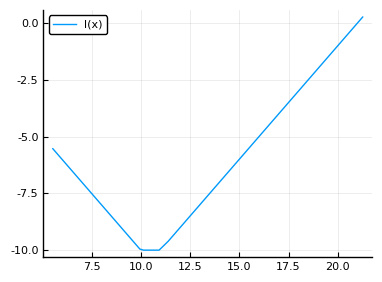

In [15]:
imagens()

In [13]:
function vetor_aurea(φ ::Function, a, b; limk = 100 , ϵ = 1e-4 )
    θ_1= (3-sqrt(5))/2
    θ_2= (-1+sqrt(5))/2
    u= a + θ_1*(b-a)
    v= a + θ_2*(b-a)
    k = 1
    fu, fv = φ(u), φ(v)
    matx = [a, u, v, b]
    maty = [φ(a), φ(u), φ(v), φ(b)]
    while abs(b-a) > ϵ && k < limk
        if fu<fv
            b, fv = v, fu
            v = u
            u = a + θ_1*(b-a)
            fu = φ(u)
            push!(matx, a, u, v, b)
            push!(maty, φ(a), φ(u), φ(v), φ(b))
        else
            a, fu = u, fv
            u = v
            v = a + θ_2*(b-a)
            fv = φ(v)
            push!(matx, a, u, v, b)
            push!(maty, φ(a), φ(u), φ(v), φ(b))
        end
        k += 1
    end
    return matx, maty
end

vetor_aurea (generic function with 1 method)

In [14]:
a0, b0 = intervalo(g)
vv, vvv= vetor_aurea(g,a0, b0)

([0.671089, 1.44009, 1.91536, 2.68435, 1.44009, 1.91536, 2.20909, 2.68435, 1.44009, 1.73382  …  2.00007, 2.00015, 1.99994, 1.99999, 2.00002, 2.00007, 1.99994, 1.99997, 1.99999, 2.00002], BigFloat[5.76601, 4.3135, 4.00716, 4.46834, 4.3135, 4.00716, 4.04372, 4.46834, 4.3135, 4.07085  …  4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0])

In [44]:
function gif(f)
    pyplot(size=(370,270))
    a0, b0 = intervalo(f)
    matx, maty = vetor_aurea(f,a0,b0)
    len = length(matx)
    #aa , uu, vv, bb = matx[1:4]
    #fa , fu, fv, fb = maty[1:4]
    #plot(f, 0, 4,label= string(f,"(x)"),framestyle=:origin) #função
    #plot!([a0], 0:0.2:f(a0), line=:dash ,w=2) #linha do a0
    #scatter!([aa uu vv bb], [fa fu fv fb], label= ["a" "u" "v" "b"], m = [:red :orange :green :blue], markersize=7)
    #.+k
    #Plots.png(string(f)) #salva as imagens
    for h = 1:4:len
        aa , uu, vv, bb = matx[h:h+3]
        fa , fu, fv, fb = maty[h:h+3]
        plot(f, a0, b0,label= string(f,"(x)"))#,framestyle=:zerolines) #função
        #plot!([a0], 0:0.2:f(a0), line=:dash ,w=2) #linha do a0
        scatter!([aa uu vv bb], [fa fu fv fb], label= ["a" "u" "v" "b"], m = [:red :orange :green :blue], markersize=7)
        Plots.png(string(h))
    end
end

gif (generic function with 1 method)

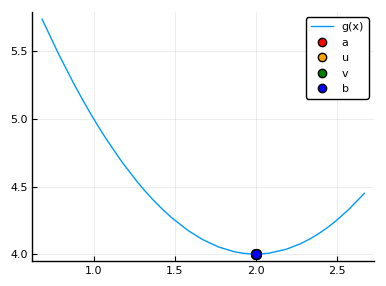

In [45]:
gif(g)